In [1]:
import sys
import os
# go to upper diretory
sys.path.append(os.path.abspath('./../../'))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from Audio_Sentiment_Analysis.utils.Configuration import Configuration

In [2]:
EXTRACTED_FEATURES_FILE = 'extracted_features_ent05.csv'
SCALED_FEATURES = 'scaled_features.csv'
CONFIG_FILE = f"{os.path.abspath('./../../')}/Audio_Sentiment_Analysis/data/config.json"
config = Configuration.load_json(CONFIG_FILE)

In [3]:
# Load the processed features writen in the dataset
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(df.shape)
df = df.sort_values(['Subject', 'Emotion'], ascending = (True, True))
df = df.set_index('Subject')
df

(1287, 35)


,File,Emotion,mel_mean,mel_min,mel_max,mel_var,mel_std,chroma_stft,rms,spectral_centroid,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,anger,5.470246,4.425599e-10,2683.060303,2835.492676,53.249344,0.402497,0.129479,1814.026368,...,-15.731797,-8.805967,-2.915169,-12.226694,-5.387331,-4.913489,-9.523164,-1.791623,-3.507744,0.083974
1,s1_an_2,anger,4.795431,3.266728e-10,1598.459473,1602.659546,40.033230,0.369817,0.122001,1813.929245,...,-15.980973,-11.601790,-5.727098,-6.378960,-7.155037,-7.385511,-8.306025,4.346861,-6.595266,-2.742662
1,s1_an_3,anger,3.334237,3.032449e-10,689.850159,542.464478,23.290867,0.402758,0.093039,1699.189320,...,-7.307014,-2.118013,-5.378597,-6.666719,-4.749491,-4.346241,-5.281549,3.802923,-7.263710,3.085279
1,s1_an_4,anger,7.300478,3.510179e-10,3062.532715,4610.922363,67.903770,0.272837,0.155781,1578.663080,...,-19.050367,-9.762542,0.404813,-14.561901,-6.730536,-4.809193,-5.546733,2.948940,-6.117626,-3.003350
1,s1_an_5,anger,6.344573,4.247520e-10,4932.327637,6391.681152,79.947990,0.312011,0.140534,1577.596083,...,-18.438587,-11.906023,-3.913879,-11.295942,-3.214928,-6.571509,-0.506520,1.930403,-6.855783,-2.346526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,s44_su_1,surprise,0.954235,4.915989e-10,224.215332,66.601624,8.160982,0.409652,0.046429,2228.845452,...,-7.934346,0.660806,-14.983005,6.784021,-5.266866,-8.150658,-2.837487,1.328877,-2.739572,0.314563
44,s44_su_2,surprise,1.101146,5.241394e-10,589.722046,168.118729,12.966061,0.355514,0.048610,2135.804124,...,-5.593808,3.912724,-7.423474,5.729438,-0.965025,-9.030694,-4.325404,-0.176191,-3.972313,-1.684264
44,s44_su_3,surprise,1.229583,5.804714e-10,417.612732,121.597954,11.027146,0.280017,0.061023,1812.903932,...,-17.904245,-1.119938,-19.384010,4.354843,-0.825229,-10.079893,-4.608428,-0.960689,-8.194977,-0.820515


In [4]:
# Min Max Scaling all features
df[df.columns[2:]] = minmax_scale(df[df.columns[2:]], config.scale_range)
# Store Scaled features in a new file
df.to_csv(SCALED_FEATURES)
df

,File,Emotion,mel_mean,mel_min,mel_max,mel_var,mel_std,chroma_stft,rms,spectral_centroid,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,anger,0.749187,0.226190,0.543893,0.383464,0.619121,0.528081,0.827658,0.195442,...,0.235475,0.421656,0.488674,0.201833,0.260923,0.350065,0.261784,0.296907,0.501349,0.324593
1,s1_an_2,anger,0.656711,0.166961,0.323958,0.216739,0.465380,0.436557,0.778661,0.195401,...,0.227772,0.347832,0.408824,0.319372,0.228203,0.271015,0.289062,0.479564,0.406021,0.246796
1,s1_an_3,anger,0.456470,0.154987,0.139710,0.073361,0.270617,0.528811,0.588888,0.146191,...,0.495930,0.598252,0.418720,0.313588,0.272729,0.368205,0.356845,0.463378,0.385383,0.407198
1,s1_an_4,anger,1.000000,0.179403,0.620843,0.623567,0.789595,0.164950,1.000000,0.094499,...,0.132880,0.396398,0.582953,0.154896,0.236060,0.353401,0.350902,0.437967,0.420769,0.239621
1,s1_an_5,anger,0.869004,0.217088,1.000000,0.864392,0.929704,0.274662,0.900099,0.094041,...,0.151794,0.339799,0.460314,0.220541,0.301134,0.297045,0.463861,0.407659,0.397978,0.257698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,s44_su_1,surprise,0.130317,0.251253,0.045289,0.009007,0.094613,0.548119,0.283484,0.373352,...,0.476536,0.671627,0.145982,0.583948,0.263153,0.246547,0.411621,0.389760,0.525066,0.330939
44,s44_su_2,surprise,0.150450,0.267885,0.119406,0.022736,0.150510,0.396499,0.297772,0.333448,...,0.548895,0.757494,0.360651,0.562751,0.342779,0.218406,0.378274,0.344975,0.487005,0.275926
44,s44_su_3,surprise,0.168050,0.296676,0.084506,0.016444,0.127955,0.185057,0.379108,0.194961,...,0.168313,0.624606,0.021006,0.535121,0.345367,0.184855,0.371931,0.321632,0.356631,0.299699


In [5]:
# Querying dataframe grouping by subject and emotions and calculating the respective mean values
df.groupby(['Subject', 'Emotion']).mean()

mel_mean   mel_min   mel_max   mel_var   mel_std  \
Subject Emotion                                                       
1       anger      0.746274  0.188926  0.525681  0.432305  0.614884   
        disgust    0.301552  0.177212  0.258473  0.085171  0.270858   
        fear       0.282142  0.195931  0.237384  0.128988  0.281034   
        happiness  0.492395  0.246755  0.280682  0.188731  0.406150   
        sadness    0.117414  0.187126  0.125337  0.013165  0.113835   
...                     ...       ...       ...       ...       ...   
44      disgust    0.080295  0.241599  0.055503  0.006578  0.077463   
        fear       0.045547  0.260561  0.061966  0.006914  0.070282   
        happiness  0.112223  0.269963  0.075187  0.010761  0.099636   
        sadness    0.013921  0.239756  0.019605  0.000439  0.019840   
        surprise   0.145903  0.273549  0.083737  0.016062  0.125129   

                   chroma_stft       rms  spectral_centroid  \
Subject Emotion                                               
1       anger         0.386612  0.819061           0.145115   
        disgust       0.511966  0.462770           0.363861   
        fear          0.372663  0.434195           0.222595   
        happiness     0.446137  0.646510           0.270214   
        sadness       0.537471  0.264625           0.240283   
...                        ...       ...                ...   
44      disgust       0.425210  0.205331           0.450528   
        fear          0.244818  0.141126           0.564211   
        happiness     0.448470  0.267631           0.425970   
        sadness       0.356886  0.066582           0.510077   
        surprise      0.365787  0.315607           0.338325   

                   spectral_contrast  spectral_bandwidth  ...    mfcc11  \
Subject Emotion                                           ...             
1       anger               0.752698            0.223282  ...  0.248770   
        disgust             0.626821            0.386140  ...  0.453849   
        fear                0.721394            0.311584  ...  0.279449   
        happiness           0.615791            0.359825  ...  0.464703   
        sadness             0.560694            0.393362  ...  0.529991   
...                              ...                 ...  ...       ...   
44      disgust             0.305223            0.579894  ...  0.333696   
        fear                0.336548            0.778872  ...  0.342320   
        happiness           0.345792            0.485014  ...  0.285828   
        sadness             0.245273            0.745097  ...  0.417766   
        surprise            0.351681            0.450340  ...  0.375653   

                     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
Subject Emotion                                                                 
1       anger      0.420787  0.471897  0.242046  0.259810  0.327946  0.344491   
        disgust    0.497611  0.611731  0.310020  0.275997  0.379832  0.317300   
        fear       0.428723  0.587192  0.250825  0.268177  0.437915  0.364068   
        happiness  0.378105  0.438486  0.272042  0.259300  0.352774  0.232970   
        sadness    0.427229  0.610709  0.333671  0.257358  0.484085  0.343339   
...                     ...       ...       ...       ...       ...       ...   
44      disgust    0.773858  0.334871  0.456792  0.329423  0.208558  0.425993   
        fear       0.815010  0.682453  0.826003  0.668620  0.700311  0.438780   
        happiness  0.720745  0.270880  0.494421  0.234460  0.147920  0.443700   
        sadness    0.740532  0.403624  0.451305  0.257276  0.291683  0.232260   
        surprise   0.692415  0.137675  0.542977  0.341268  0.293339  0.454188   

                     mfcc18    mfcc19    mfcc20  
Subject Emotion                                  
1       anger      0.417095  0.422300  0.295181  
        disgust    0.393161  0.395105  0.376945  
        fear       0.352011  0.319306  0.2784

In [6]:
# Querying dataframe grouping by emotions and calculating the respective mean values
emotion_df = df.groupby(['Emotion']).mean()
emotion_df

,mel_mean,mel_min,mel_max,mel_var,mel_std,chroma_stft,rms,spectral_centroid,spectral_contrast,spectral_bandwidth,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Emotion,,,,,,,,,,,,,,,,,,,,,
anger,0.268770,0.254518,0.158889,0.063700,0.191203,0.443797,0.423197,0.275551,0.547289,0.365328,...,0.461575,0.545584,0.433820,0.366132,0.252728,0.460658,0.252692,0.324140,0.405216,0.270288
disgust,0.148310,0.276574,0.098113,0.030279,0.120932,0.500078,0.283478,0.441134,0.480760,0.502082,...,0.537677,0.578754,0.432657,0.418956,0.272438,0.491652,0.275408,0.371165,0.390246,0.297805
fear,0.150794,0.282765,0.095859,0.040563,0.126500,0.442405,0.273724,0.386461,0.501970,0.494152,...,0.500735,0.555271,0.411094,0.408143,0.272255,0.491740,0.278326,0.348445,0.389616,0.293177
happiness,0.230514,0.280493,0.141114,0.062179,0.180351,0.472642,0.377594,0.389377,0.503503,0.435408,...,0.512105,0.527150,0.393490,0.400714,0.277871,0.471560,0.279951,0.380115,0.405937,0.288905
sadness,0.059617,0.271755,0.047848,0.007586,0.053430,0.529608,0.151340,0.382754,0.417240,0.532777,...,0.590223,0.604299,0.453114,0.430164,0.278474,0.514876,0.286716,0.360282,0.407477,0.303585
surprise,0.161122,0.293521,0.100185,0.033537,0.128476,0.500540,0.293261,0.312776,0.468335,0.436771,...,0.553716,0.551120,0.393550,0.404137,0.283050,0.460078,0.261759,0.335888,0.396316,0.271065


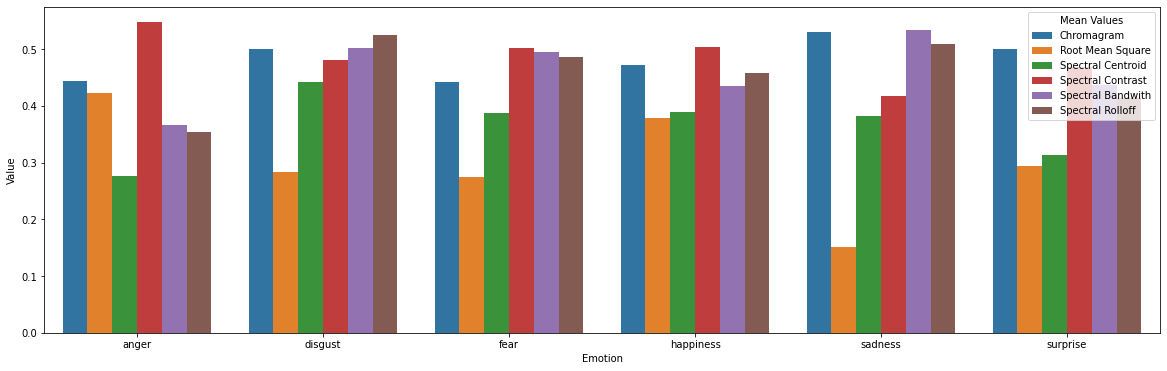

In [7]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Chromagram"]*6+["Root Mean Square"]*6+["Spectral Centroid"]*6+["Spectral Contrast"]*6+["Spectral Bandwith"]*6+\
            ["Spectral Rolloff"]*6+["Zero Crossing Rate"]*6,
        list(emotion_df['chroma_stft'].values)+list(emotion_df['rms'].values)+list(emotion_df['spectral_centroid'].values)+list(emotion_df['spectral_contrast'].values)+\
            list(emotion_df['spectral_bandwidth'].values)+list(emotion_df['spectral_rolloff'].values)+list(emotion_df['zero_crossing_rate'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()